<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Individual_Project/Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Project - Deliverable #2
## Ken Noppinger

Source from Gitbhub for Johns Hopkins Resource Center: 

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-23-2020.csv

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly

#### Fix '''pandas''' and '''pandas_profiling''' versions

In [2]:
print("pandas version:\t", pd.__version__)

pandas version:	 1.1.2


In [3]:
# Issue with pandas profiling
# Upgrade both pandas and pandas_profiling packages solve the problem

!pip install pandas pandas_profiling --upgrade

     |████████████████████████████████| 9.5MB 2.6MB/s 
     |████████████████████████████████| 266kB 38.9MB/s 
     |████████████████████████████████| 3.1MB 40.4MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 604kB 50.6MB/s 
     |████████████████████████████████| 296kB 47.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=8b9f3db6d93e64a8ce2bb9ee8ecaa19f31300c0ac8b8acefc1e825e927dfad52
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=37f1196720bb15008d97874474e1df2380c33f4c092b42d9e7d0d0c48d11a959
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin ima

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport

#### Install ```plotly``` package

In [5]:
!pip install -U plotly

     |████████████████████████████████| 13.1MB 2.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [38]:
import plotly

# Part I - Data Loading, Cleaning, and Merging 

## 1 - Read COVID-19 Daily Report

In [6]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-23-2020.csv

--2020-10-25 04:19:22--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-23-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555600 (543K) [text/plain]
Saving to: ‘10-23-2020.csv’

10-23-2020.csv      100%[===================>] 542.58K  --.-KB/s    in 0.07s   

2020-10-25 04:19:23 (7.66 MB/s) - ‘10-23-2020.csv’ saved [555600/555600]



In [7]:
covid_df = pd.read_csv("10-23-2020.csv")
covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-24 04:24:46,33.93911,67.709953,40687,1507,34010,5170.0,Afghanistan,104.517683,3.703886
1,NaN,NaN,NaN,Albania,2020-10-24 04:24:46,41.15330,20.168300,18556,469,10466,7621.0,Albania,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,2020-10-24 04:24:46,28.03390,1.659600,55630,1897,38788,14945.0,Algeria,126.861293,3.410031
3,NaN,NaN,NaN,Andorra,2020-10-24 04:24:46,42.50630,1.521800,4038,69,2729,1240.0,Andorra,5226.169676,1.708767
4,NaN,NaN,NaN,Angola,2020-10-24 04:24:46,-11.20270,17.873900,8829,265,3384,5180.0,Angola,26.863409,3.001472


In [8]:
covid_df.shape

(3958, 14)

### 1.1 - Cleanup Columns

In [9]:
covid_df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

Rename the following columns: Admin2 and Combined_Key

In [10]:
covid_df.rename(columns = {'Admin2':'County', 'Combined_Key':'Place'}, inplace = True)

Remove columns that irrelevant to the study

In [11]:
irrelevant_columns = ['Last_Update', 'Lat', 'Long_', 'Recovered', 'Active']
covid_df = covid_df.drop(irrelevant_columns, axis=1)
covid_df.head(3)

,FIPS,County,Province_State,Country_Region,Confirmed,Deaths,Place,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,40687,1507,Afghanistan,104.517683,3.703886
1,NaN,NaN,NaN,Albania,18556,469,Albania,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,55630,1897,Algeria,126.861293,3.410031


Reorder columns

In [12]:
column_order = ['FIPS','County','Province_State','Country_Region','Place','Confirmed','Deaths','Incidence_Rate','Case-Fatality_Ratio'] 
covid_df = covid_df[column_order] 
covid_df.head(3) 

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,Afghanistan,40687,1507,104.517683,3.703886
1,NaN,NaN,NaN,Albania,Albania,18556,469,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,Algeria,55630,1897,126.861293,3.410031


In [13]:
covid_df.shape

(3958, 9)

### 1.2 - Remove Irrelevant Data

Drop any duplicate rows.

In [14]:
covid_df = covid_df.drop_duplicates()
covid_df.shape

(3958, 9)

Determine how much of the dataframe is useful for the study.

In [15]:
covid_df["Country_Region"].value_counts().head(10)

US          3272
Russia        83
Japan         49
India         37
Colombia      34
China         33
Mexico        32
Ukraine       27
Brazil        27
Peru          26
Name: Country_Region, dtype: int64

Note: Non-US data is irrelvant since only US counties are being studied.

Only keep the records representing US data.

In [16]:
covid_us_df = covid_df[covid_df.Country_Region == "US"]
covid_us_df.shape

(3272, 9)

Check Data Types and Counts

In [17]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3957
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3261 non-null   float64
 1   County               3266 non-null   object 
 2   Province_State       3789 non-null   object 
 3   Country_Region       3958 non-null   object 
 4   Place                3958 non-null   object 
 5   Confirmed            3958 non-null   int64  
 6   Deaths               3958 non-null   int64  
 7   Incidence_Rate       3877 non-null   float64
 8   Case-Fatality_Ratio  3916 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 309.2+ KB


The Non-Null counts are not the same, so cleanup missing data before moving forward.

### 1.3 - Missing Data Cleanup

Visualize the dataframe to identify missing data

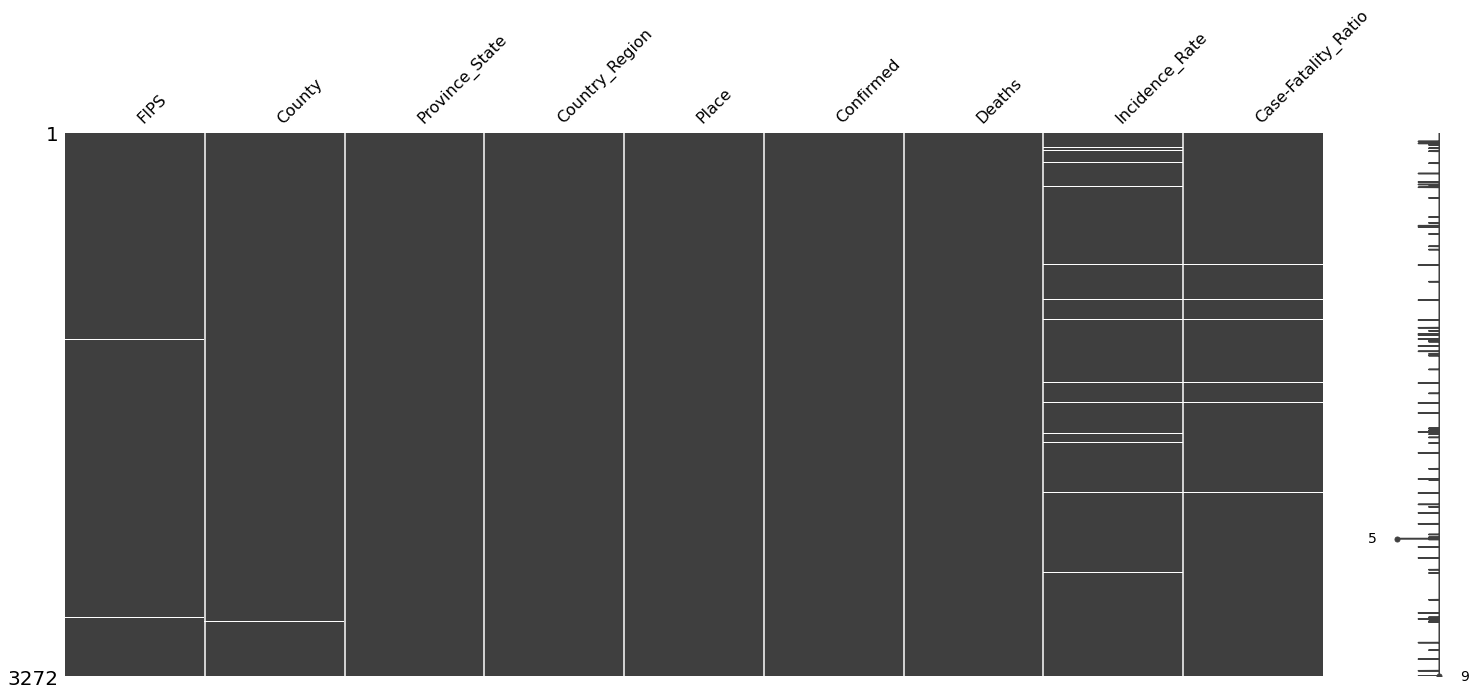

In [18]:
# Reference: https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/
import missingno as msno
msno.matrix(covid_us_df)

Investigate records without a FIPS code

In [19]:
covid_nofips_us_df = covid_us_df[covid_us_df.FIPS.isna()]
covid_nofips_us_df.shape

(11, 9)

In [20]:
covid_nofips_us_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1881,NaN,Dukes and Nantucket,Massachusetts,US,"Dukes and Nantucket, Massachusetts, US",213,2,741.359507,0.938967
1916,NaN,Federal Correctional Institution (FCI),Michigan,US,"Federal Correctional Institution (FCI), Michig...",197,5,NaN,2.538071
1948,NaN,Michigan Department of Corrections (MDOC),Michigan,US,"Michigan Department of Corrections (MDOC), Mic...",6459,75,NaN,1.161170
2201,NaN,Kansas City,Missouri,US,"Kansas City, Missouri, US",13989,184,2861.069695,1.315319
3075,NaN,NaN,Recovered,US,"Recovered, US",0,0,NaN,NaN
3548,NaN,Bear River,Utah,US,"Bear River, Utah, US",4867,15,2605.209348,0.308198
3549,NaN,Central Utah,Utah,US,"Central Utah, Utah, US",1176,7,1434.951314,0.595238
3553,NaN,Southeast Utah,Utah,US,"Southeast Utah, Utah, US",422,3,1048.994506,0.710900
3554,NaN,Southwest Utah,Utah,US,"Southwest Utah, Utah, US",5705,49,2263.511637,0.858896
3557,NaN,TriCounty,Utah,US,"TriCounty, Utah, US",384,2,678.181626,0.520833


Records lacking a FIPS code cannot be used in the study because the field will be joined with land area data needed to determine population density for each county.

Remove the records without a FIPS code.

In [21]:
covid_us_df = covid_us_df[covid_us_df.FIPS.notna()]
covid_us_df.shape

(3261, 9)

Investigate records without a County

In [22]:
covid_no_county_us_df = covid_us_df[covid_us_df.County.isna()]
covid_no_county_us_df.shape

(5, 9)

In [23]:
covid_no_county_us_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
961,88888.0,NaN,Diamond Princess,US,"Diamond Princess, US",49,0,NaN,0.000000
1192,99999.0,NaN,Grand Princess,US,"Grand Princess, US",103,3,NaN,2.912621
1193,66.0,NaN,Guam,US,"Guam, US",4141,69,2521.479154,1.666264
2721,69.0,NaN,Northern Mariana Islands,US,"Northern Mariana Islands, US",88,2,159.582185,2.272727
3577,78.0,NaN,Virgin Islands,US,"Virgin Islands, US",1346,21,1254.801059,1.560178


These records represent provinces or special COVID groupings irrelevant to the study and can be removed.

In [24]:
covid_us_df = covid_us_df[covid_us_df.County.notna()]
covid_us_df.shape

(3256, 9)

In [25]:
covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 633 to 3904
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3256 non-null   float64
 1   County               3256 non-null   object 
 2   Province_State       3256 non-null   object 
 3   Country_Region       3256 non-null   object 
 4   Place                3256 non-null   object 
 5   Confirmed            3256 non-null   int64  
 6   Deaths               3256 non-null   int64  
 7   Incidence_Rate       3194 non-null   float64
 8   Case-Fatality_Ratio  3222 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 254.4+ KB


There are still NaNs in the following filed not critical to the study: Lat, Long_, Active, Incidence_Rate, Case-Fatality_Ratio.

Set these NaNs to a value of zero.

In [26]:
covid_us_df = covid_us_df.fillna({'Lat':0, 'Long_':0, 'Active':0, 'Incidence_Rate':0, 'Case-Fatality_Ratio':0})
covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 633 to 3904
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3256 non-null   float64
 1   County               3256 non-null   object 
 2   Province_State       3256 non-null   object 
 3   Country_Region       3256 non-null   object 
 4   Place                3256 non-null   object 
 5   Confirmed            3256 non-null   int64  
 6   Deaths               3256 non-null   int64  
 7   Incidence_Rate       3256 non-null   float64
 8   Case-Fatality_Ratio  3256 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 254.4+ KB


All NaNs addressed.  Check column statistics to identify any other missing data

In [27]:
covid_us_df.describe(include='all')

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
count,3256.000000,3256,3256,3256,3256,3256.000000,3256.000000,3256.000000,3256.000000
unique,NaN,1911,52,1,3256,NaN,NaN,NaN,NaN
top,NaN,Unassigned,Texas,US,"Noxubee, Mississippi, US",NaN,NaN,NaN,NaN
freq,NaN,51,255,3256,1,NaN,NaN,NaN,NaN
mean,32367.711302,NaN,NaN,NaN,NaN,2594.035319,68.644042,2453.996859,2.078430
std,17894.506633,NaN,NaN,NaN,NaN,9952.812883,331.431406,1650.282530,3.274205
min,1001.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,19054.500000,NaN,NaN,NaN,NaN,199.000000,2.000000,1308.989333,0.702929
50%,30068.000000,NaN,NaN,NaN,NaN,562.000000,9.000000,2169.107812,1.531170
75%,47035.500000,NaN,NaN,NaN,NaN,1596.500000,32.000000,3263.993947,2.708753


Note "Unassigned" is the most frequent value in the "admin2" column, which represents a county.  

This field should not be unassigned and needs to be investigated.

In [28]:
unassigned_df = covid_us_df[covid_us_df.County == "Unassigned"] 
unassigned_df.shape

(51, 9)

In [29]:
unassigned_df.sample(10)

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
2466,90034.0,Unassigned,New Jersey,US,"Unassigned, New Jersey, US",432,0,0.0,0.000000
1890,90025.0,Unassigned,Massachusetts,US,"Unassigned, Massachusetts, US",3693,5,0.0,0.135391
2259,90029.0,Unassigned,Missouri,US,"Unassigned, Missouri, US",0,0,0.0,0.000000
816,90005.0,Unassigned,Arkansas,US,"Unassigned, Arkansas, US",2142,0,0.0,0.000000
1429,90018.0,Unassigned,Indiana,US,"Unassigned, Indiana, US",0,234,0.0,0.000000
2920,90041.0,Unassigned,Oregon,US,"Unassigned, Oregon, US",0,0,0.0,0.000000
2319,90030.0,Unassigned,Montana,US,"Unassigned, Montana, US",0,0,0.0,0.000000
3902,90056.0,Unassigned,Wyoming,US,"Unassigned, Wyoming, US",0,0,0.0,0.000000
1529,90019.0,Unassigned,Iowa,US,"Unassigned, Iowa, US",8,0,0.0,0.000000
697,90001.0,Unassigned,Alabama,US,"Unassigned, Alabama, US",0,0,0.0,0.000000


Records with county field value of "Unassigned" represent states.

The study is looking at county-level population denisty, so state records are irrelevant and can be removed.

Remove the records with the county "Unassigned".

In [30]:
covid_counties_df = covid_us_df[covid_us_df.County != "Unassigned"]
covid_counties_df.shape

(3205, 9)

### 1.4 - Verify Data Types

In [31]:
covid_counties_df.dtypes

FIPS                   float64
County                  object
Province_State          object
Country_Region          object
Place                   object
Confirmed                int64
Deaths                   int64
Incidence_Rate         float64
Case-Fatality_Ratio    float64
dtype: object

FIPS code was read in as float because there were NaNs and that is a float type.

FIPS should be integer, so recast the column from float64 to int

Reference: https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy

In [32]:
covid_counties_df = covid_counties_df.assign(FIPS=lambda x: x['FIPS'].astype(int))

In [33]:
covid_counties_df.sample(5)

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
3221,47051,Franklin,Tennessee,US,"Franklin, Tennessee, US",1263,17,2992.323730,1.346002
2443,33015,Rockingham,New Hampshire,US,"Rockingham, New Hampshire, US",2484,105,801.887858,4.227053
3888,56015,Goshen,Wyoming,US,"Goshen, Wyoming, US",148,3,1120.278556,2.027027
2013,27069,Kittson,Minnesota,US,"Kittson, Minnesota, US",38,0,884.132154,0.000000
3368,48151,Fisher,Texas,US,"Fisher, Texas, US",96,3,2506.527415,3.125000


Number of Provinces/States

In [34]:
covid_counties_df.Province_State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [35]:
num_provinces_states = len(covid_counties_df.Province_State.unique())
num_provinces_states

52

Note that Puerto Rico and Washington, DC are included in the study.

### 1.5 - Pandas Profile Report

In [36]:
type(covid_counties_df)

pandas.core.frame.DataFrame

In [37]:
prof = ProfileReport(covid_counties_df, minimal=True)
prof.to_file(output_file="covid19_daily_report.html")
prof

OSError: ignored

## 2 - Read Population Data

In [ ]:
!wget https://www.ers.usda.gov/webdocs/DataFiles/48747/PopulationEstimates.xls

In [ ]:
pop_df = pd.read_excel("PopulationEstimates.xls")
pop_df.head()

### 2.1 - Cleanup Columns

Reread the excel file skipping the first two lines.

In [ ]:
columns_of_interest = ['FIPStxt','State','Area_Name','POP_ESTIMATE_2019']
pop_df = pd.read_excel("PopulationEstimates.xls", usecols=columns_of_interest, skiprows=2)
pop_df.head()

In [ ]:
pop_df.shape

### 2.2 - Remove Irrelevant Data

In [ ]:
# Look for any "bad" States
print(pop_df["State"].value_counts())

Only the US record is extraneous.  Remove this record since it doesn't represent a state.

In [ ]:
pop_df = pop_df[pop_df.State != "US"]
pop_df.shape

Drop any duplicate rows.


In [ ]:
pop_df = pop_df.drop_duplicates()
pop_df.shape

No duplicates

### 2.3 - Missing Data Cleanup

Visualize the population dataframe to identify any missing data

In [ ]:
msno.matrix(pop_df)

No Missing Data

### 2.4 - Verify Data Types

In [ ]:
pop_df.info()

In [ ]:
pop_df.State.unique()

In [ ]:
num_states = len(pop_df.State.unique())
num_states

The expected 50 states plus Puerto Rico and Washington, DC are included in the study.

## 3 - Merge County COVID and Population Data

### 3.1 - Cleanup FIPS Codes 
Compare FIPS codes before joining the dataframes to determine any anamoly.

In [ ]:
# Unique FIPS codes in the Covid data for counties.
len(covid_counties_df.FIPS.unique())

In [ ]:
# Unique FIPS codes in the population data for counties.
len(pop_df.FIPStxt.unique())

Inspect the different codes to determine if rows can be removed.

In [ ]:
# FIPS codes in the Covid data but not in the population data.
no_pop_df = covid_counties_df[~covid_counties_df.FIPS.isin(pop_df.FIPStxt.values)]
no_pop_df

These records represent non-county level Covid data and can be dropped.

In [ ]:
# FIPS codes in the population data but not in the Covid data.
no_covid_df = pop_df[~pop_df.FIPStxt.isin(covid_counties_df.FIPS.values)]
no_covid_df

These records represent non-county level population data and can be dropped.

### 3.2 - Merge Dataframes
Perform inner join to combine the two datafrmes eliminating both extraneous sets of data above.

In [ ]:
county_df = covid_counties_df.merge(pop_df, how="inner", left_on='FIPS', right_on='FIPStxt').drop(['FIPStxt', 'Area_Name'], axis=1)
county_df

Rename and Reorder Columns


In [ ]:
county_df.rename(columns = {'Country_Region':'Country', 'POP_ESTIMATE_2019':'Population_2019'}, inplace = True)
column_order = ['FIPS','County','Province_State','State','Country','Place','Population_2019','Confirmed','Deaths','Incidence_Rate','Case-Fatality_Ratio'] 
county_df = county_df[column_order] 
county_df.head(3) 

### 3.3 - Missing Data Cleanup

In [ ]:
msno.matrix(county_df)

No missing data.

### 3.4 - Pandas Profiling Report

In [ ]:
prof = ProfileReport(county_df, minimal=True)
prof.to_file(output_file="counties.html")
prof

Sample the county data.

In [ ]:
county_df.sample(10)

Sort the county data by population

In [ ]:
county_df = county_df.sort_values(by='Population_2019', ascending=False)
county_df.head(10)

---
## 4 - Read Land Area Data

In [ ]:
!wget https://www2.census.gov/library/publications/2011/compendia/usa-counties/excel/LND01.xls

### 4.1 - Cleanup Columns

In [ ]:
# STCOU - FIPS code for state or county
# Areaname - County and State
# LND110210D - Land area in square miles, 2010 SQM
columns_of_interest = ['Areaname','STCOU','LND110210D']
land_area_df = pd.read_excel("LND01.xls", usecols=columns_of_interest, skiprows=0)
land_area_df.head()

In [ ]:
# Perform a test lookup
land_area_df[land_area_df.Areaname == 'Howard, MD']

In [ ]:
land_area_df.shape

In [ ]:
land_area_df.info()

---
## 5 -  Merge Land Area and County COVID Data

### 5.1 - Cleanup FIPS Codes
Compare FIPS codes before joining the dataframes to determine any anamoly.

In [ ]:
# Unique FIPS codes in the county data.
len(county_df.FIPS.unique())

In [ ]:
# Unique FIPS codes in the land area data for counties.
len(land_area_df.STCOU.unique())

Inspect the different codes to determine if rows can be removed.

In [ ]:
# FIPS codes in the County data but not in the Land Area data.
no_land_area_df = county_df[~county_df.FIPS.isin(land_area_df.STCOU.values)]
no_land_area_df.shape

In [ ]:
# FIPS codes in the land area data but not in the Covid data.
no_covid_df = land_area_df[~land_area_df.STCOU.isin(county_df.FIPS.values)]
no_covid_df.shape

In [ ]:
no_covid_df.sample(5)

These records represent non-county or incomplete county, covid, population, or land area level data and can be dropped.

### 5.2 - Merge Dataframes
Perform inner join to combine the two datafrmes eliminating both extraneous sets of data above.

In [ ]:
county_df = county_df.merge(land_area_df, how="inner", left_on='FIPS', right_on='STCOU').drop(['STCOU', 'Areaname'], axis=1)
county_df.shape

Rename Columns

In [ ]:
county_df.rename(columns = {'LND110210D':'Land_Area'}, inplace = True)

In [ ]:
county_df.sample(10)

### 5.3 - Missing Data Cleanup

In [ ]:
msno.matrix(county_df)

No missing data.

### 5.4 - Function: ratio
Used to calculate ratios for the study such as:
- Population per square mile 
- Confirmed COVID cases per square mile
- COVID deaths per square mile

In [ ]:
def ratio(x, y):

    # Return ratio as an integer.
    return int(x / y)

Test the ```ratio``` function

In [ ]:
# pop_square_mile test (example - more population than square mileage)
ratio(10039107, 4057.88)

In [ ]:
# pop_square_mile test (example - more square mileage than population)
ratio(169, 668.93) 

### 5.5 - Add Square Mileage Ratio Columns
Apply the ```ratio``` function to add the following columns to each county record:
- Population per Square Mile
- Confirmed COVID Cases per Square Mile
- COVID Deaths per Square Mile

In [ ]:
county_df["Pop_Sq_Mile"] = county_df[["Population_2019", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df["Confirmed_Sq_Mile"] = county_df[["Confirmed", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df["Deaths_Sq_Mile"] = county_df[["Deaths", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df.head()

Create a "Display Name" field representing the county and state abreviaiton to use in charting labels

In [ ]:
def place(county, state):
    return county + ', ' + state

In [ ]:
county_df["Display_Name"] = county_df[["County", "State"]].apply(lambda x: place(*x), axis=1)

In [ ]:
county_df.head(3)

Reorder columns


In [ ]:
county_df = county_df[['FIPS','County','State','Display_Name','Land_Area',
                       'Population_2019','Pop_Sq_Mile',
                       'Confirmed','Confirmed_Sq_Mile',
                       'Deaths','Deaths_Sq_Mile',
                       'Incidence_Rate','Case-Fatality_Ratio']]
county_df.sample(5)

---
## 6 - Charting Functions

### 6.1 - Function: scatter_plot

In [ ]:
def scatter_plot(x_list, y_list, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) # verify lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

    plt.show()

### 6.2 - Function: scatter_plot_with_labels

- Ref: https://www.tutorialexample.com/python-matplotlib-implement-a-scatter-plot-with-labels-a-completed-guide-matplotlib-tutorial/

In [ ]:
def scatter_plot_with_labels(x_list, y_list, annotaton_labels, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) == len(annotation_labels) # verify all lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    for i, label in enumerate(annotation_labels): # get (0, label)
        x = x_list[i]
        y = y_list[i] 
        plt.scatter(x, y, c='blue')         
        plt.annotate(label,
                     xy=(x, y), # show point 
                     xytext=(0, 4), # show annotate
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=10)

    plt.show()

# **Part II - Questions**

---
## Q1 - What counties in the US are the most populated?

### Q1.1 - Identify Top 10 Most Populated Counties

In [ ]:
most_populated_df = county_df.sort_values(by='Population_2019',ascending=False).head(15) 
most_pop_df = most_populated_df[['Display_Name','Population_2019']]
most_pop_df

Show the top 15 Most Populated Counties in a bar chart.

In [ ]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xlabel('\n'+'Population', fontsize=16)
plt.ylabel('County' + '\n', fontsize=16)
plt.title('15 Most Populated Counties', fontsize=20, va='bottom')
plt.barh(most_pop_df['Display_Name'], most_pop_df['Population_2019'])
plt.show()

### 1.3 - Histograms of County Populations

Show histogram of all county populations

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(list(county_df.Population_2019), bins=10)
plt.ticklabel_format(style='plain')
plt.title('Histogram of All County Populations', fontsize=16)
plt.xlabel('County Populations')
plt.show()

This chart isn't useful because the majority of counties have populations below 1 million people.  
So, rechart two histograms dividing the data at the 1 million population mark.

Show histogram for County Populations of 1 Million or more people

In [ ]:
pop_over_1M = county_df[county_df['Population_2019'] >= 1000000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_over_1M.Population_2019), bins=9)
plt.title('Histogram for County Populations of 1 Million or More People', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

This chart shows that 30 counties have between 1 million and 2 million people and about half that many have more thn 2 million people.

Now, show histogram bins for counties with population under 1 Million

In [ ]:
pop_under_1M = county_df[county_df['Population_2019'] < 1000000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_under_1M.Population_2019), bins=6)
plt.title('Histogram for County Populations Under 1 Million People', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

This chart shows over 2500 of the counties in the study have less than 200K people.  

Now, show histogram bins for counties with population under 200 Thousand People

In [ ]:
pop_under_200K = county_df[county_df['Population_2019'] < 200000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_under_200K.Population_2019), bins=10)
plt.title('Histogram for County Populations Under 200 Thousand People', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

So, this chart shows a good distribution of the less populated counties.  Given there are slightly over 3100 counties in the study, this chart shows that more than a third of them have population with less than 25K people.

Some of these counties may surface later in the analysis based on their population density.

---
## Q2 - What counties in the US are the most densely populated?

### Q2.1 - Identify Most Densely Populated Counties
Determined by sorting the county dataframe by population per square mile in descending order and saving the top 15 county records. 

In [ ]:
most_densely_populated_df = county_df.sort_values(by='Pop_Sq_Mile',ascending=False).head(15) 
most_dense_df = most_densely_populated_df[['Display_Name','Pop_Sq_Mile']]
most_dense_df

Show the top 15 Most Densely Populated Counties in a bar chart.

In [ ]:
plt.figure(figsize=(10, 6))
#plt.ticklabel_format(style='plain')
plt.xlabel('\n'+'Population Per Square Mile', fontsize=16)
plt.ylabel('County' + '\n', fontsize=16)
plt.title('15 Most Densely Populated Counties', fontsize=20, va='bottom')
plt.barh(most_dense_df['Display_Name'], most_dense_df['Pop_Sq_Mile'])
plt.show()

### Q2.2 - Histograms of Population Density

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(list(county_df.Pop_Sq_Mile), bins=10)
plt.ticklabel_format(style='plain')
plt.title('Histogram of All County Population Per Square Mile', fontsize=16)
plt.xlabel('County Population Per Square Mile')
plt.show()

Again, this chart is not very useful since the majority of counties have less than 10K persons per square mile.

Show histogram for counties with over 10K Persons per square mile since these will map to the counties in the bar chart above.

In [ ]:
pop_density_over_10K = county_df[county_df['Pop_Sq_Mile'] >= 10000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_density_over_10K.Pop_Sq_Mile), bins=9)
plt.title('Histogram for County Population Densities of 10K Persons Per Square Mile', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

---
## Q3 - What counties in the US have the most confirmed cases of COVID-19?

### Q3.1 - Identify Counties with Highest Confirmed COVID Cases


By Confirmed Cases (regardless of population or density)

Determined by sorting the county dataframe by confirmed cases in descending order and saving the top 15 county records. 

In [ ]:
highest_cases_df = county_df.sort_values(by='Confirmed',ascending=False).head(15)
most_cases_df = highest_cases_df[['Display_Name','Confirmed','Confirmed_Sq_Mile','Pop_Sq_Mile']]
most_cases_df

Show the top 15 counties with the most Confirmed COVID-19 Cases

In [ ]:
plt.figure(figsize=(10, 6))
#plt.ticklabel_format(style='plain')
plt.xlabel('\n'+'Confirmed COVID-19 Cases', fontsize=16)
plt.ylabel('County' + '\n', fontsize=16)
plt.title('15 Counties with Most COVID-19 Cases', fontsize=20, va='bottom')
plt.barh(most_cases_df['Display_Name'], most_cases_df['Confirmed'])
plt.show()

#### Q3.1.2 - Determined by sorting the county dataframe by confirmed cases per square mile in descending order and saving the top 15 county records. 

In [ ]:
highest_case_rate_by_density_df = county_df.sort_values(by='Confirmed_Sq_Mile',ascending=False).head(15)
highest_case_density_df = highest_case_rate_by_density_df[['Display_Name','Confirmed','Confirmed_Sq_Mile']]
highest_case_density_df


### Q3.2 - Scatter plot of Confirmed Cases vs. County Popluations

In [ ]:
top_n = county_df.shape[0]

# Set titles
suptitle = 'US Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019.head(top_n))]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
y_list = [y / 1000 for y in list(county_df.Confirmed.head(top_n))]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Show the scatter plot
scatter_plot(x_list, y_list, x_label, y_label, suptitle, title)

Data is bunched in lower left corner, so see if histogram charts give a better characterization of the data.

Show a scatter plot of confirmed cases for the top 10 most populated US counties

In [ ]:
top_n = 10

# Set titles
suptitle = 'Top 10 Most Populated US Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019.head(top_n))]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(county_df.Confirmed.head(top_n))]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Set annotations
annotation_labels = county_df.County.head(top_n)

# Show the scatter plot
scatter_plot_with_labels(x_list, y_list, annotation_labels, x_label, y_label, suptitle, title)

Repeat without Outlier (Los Angeles) since its population skews the chart

In [ ]:
top_n = 10

# Set titles
suptitle = 'Top 10 Most Populated US Counties (minus LA)'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019[1:top_n+1])]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(county_df.Confirmed[1:top_n+1])]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Set annotations
annotation_labels = county_df.County[1:top_n+1]

# Show the scatter plot
scatter_plot_with_labels(x_list, y_list, annotation_labels, x_label, y_label, suptitle, title)

Show this chart again using the '''plotyly''' package to show dynamic labels.

In [ ]:
top_n = 10

# Set titles
suptitle = 'Top 10 Most Populated US Counties (minus LA)'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019[1:top_n+1])]

# Set list of Confirmed Cases in thousands
y_list = [y / 1000 for y in list(county_df.Confirmed[1:top_n+1])]

pd.options.plotting.backend = "plotly"

plt.figure(figsize=(14, 8))  # in inches   
plt.xlabel('\n'+ '2019 Population' + '\n' + '(in millions)', fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases' + '\n' + '(in thousands)' + '\n', fontsize=16)
plt.suptitle(suptitle, fontsize=20, va='bottom')
plt.title(title  + '\n', fontsize=18, va='center')
plt.ticklabel_format(style='plain')

plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

plt.show()

***NOTE: ```plotly``` dynamic behavior doesn't seem to be working in Google Colab environment.***

Reset default to ```matplotlib```

### Q3.3 - Scatter plot of Confirmed Cases vs. County Population Densities

In [ ]:
top_n = county_df.shape[0]

# Set titles
suptitle = 'US Counties'
title = 'Confirmed Cases vs. Population Density'

# Set list of Population Densities
#x_list = [x for x in list(county_df.Pop_Sq_Mile.head(top_n))]
x_list = list(county_df.Pop_Sq_Mile.head(top_n))
x_label = 'Population per Square Mile' + '\n'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(county_df.Confirmed.head(top_n))]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Show the scatter plot
scatter_plot(x_list, y_list, x_label, y_label, suptitle, title)

Data is bunched in lower left corner, so see if histogram charts give a better characterization of the data.

In [ ]:
highest_case_rate_by_density_df = county_df.sort_values(by='Confirmed_Sq_Mile',ascending=False).head(15)
highest_case_rate_by_density_df.head(10)

### Q3.3 - Confirmed Cases Per Square Mile Versus Population Per Square Mile

In [ ]:
# Create plot
fig = plt.figure(figsize=(14,6))
#ax = plt.gca()
plt.scatter(county_df.Pop_Sq_Mile, county_df.Confirmed_Sq_Mile , alpha=0.3, c="blue", edgecolors='none')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Population Per Square Mile',fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases Per Square Mile',fontsize=16)
plt.title('Confirmed Cases Per Square Mile vs. Population Per Square Mile',fontsize=18)
plt.suptitle('US Counties',fontsize=20)
#plt.legend(loc=2)#
plt.show()

In [ ]:
#county_df.hist(figsize=(14,10))

In [ ]:
#county_df['Land_Area'].hist()

---
## Q4 - Are the most densely populated counties the ones with the highest case counts? If not, which ones?

---
## Q5 - How do case counts in densely populated counties compare to counts in counties with the highest rates of cases per million people? Is there a correlation?

---
## Special Look: New York
New York is known to have had the worst outbreak early on in the OVID-19 crisis, so take a look at its most populated counties.

In [ ]:
ny_top10_df = county_df[county_df.State=='NY'].head(10)
ny_top10_df

#### Show a scatter plot of confirmed cases for the top 10 most populated NY counties 

In [ ]:
# Set titles
suptitle = 'NY Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(ny_top10_df.Population_2019)]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(ny_top10_df.Confirmed)]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Set annotations
annotation_labels = ny_top10_df.County

# Show the scatter plot
scatter_plot_with_labels(x_list, y_list, annotation_labels, x_label, y_label, suptitle, title)

In [ ]:
pd.options.plotting.backend = "matplotlib"

# COMPLETE

In [ ]:
# Create plot
fig = plt.figure(figsize=(14,6))
#ax = plt.gca()
plt.scatter(ny_top10_df.Population_2019, ny_top10_df.Confirmed, alpha=1.0, c="blue", edgecolors='none')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('2019 Population',fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases',fontsize=16)
plt.suptitle('NY Counties',fontsize=20)
plt.title('Confirmed Cases vs. Population',fontsize=18)
plt.show()